<a href="https://colab.research.google.com/github/AtheeshV/work/blob/main/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

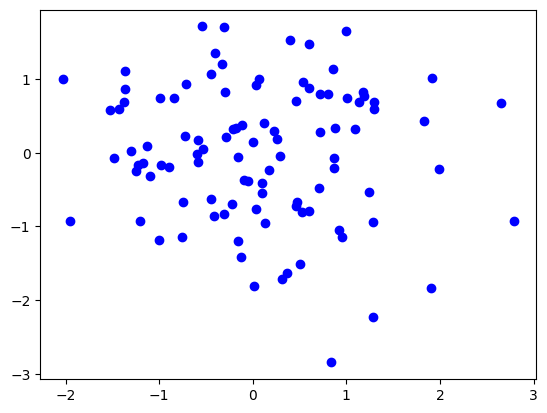

In [ ]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'bo')


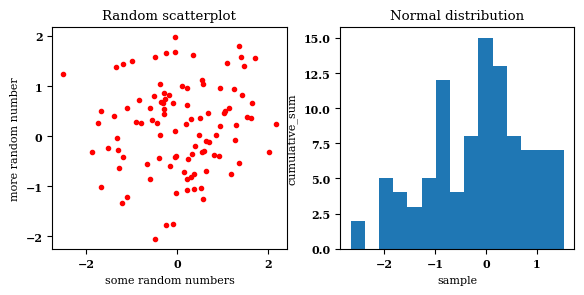

In [ ]:
with mpl.rc_context(rc={'font.family':'serif', 'font.weight':'bold', 'font.size':8}):
  fig =plt.figure(figsize=(6,3))
  ax1 = fig.add_subplot(121)
  ax1.set_xlabel('some random numbers')
  ax1.set_ylabel('more random number')
  ax1.set_title('Random scatterplot')
  plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
  ax2 = fig.add_subplot(122)

  plt.hist(np.random.normal(size=100), bins=15)
  ax2.set_xlabel('sample')
  ax2.set_ylabel('cumulative_sum')
  ax2.set_title('Normal distribution')
  plt.tight_layout()
  plt.savefig("normalvars.png", dpi =150)



<Axes: >

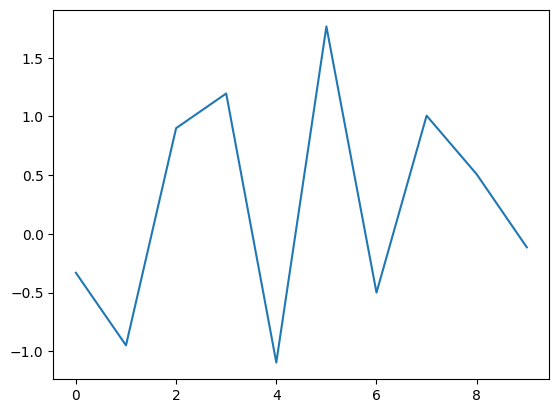

In [ ]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()


<Axes: >

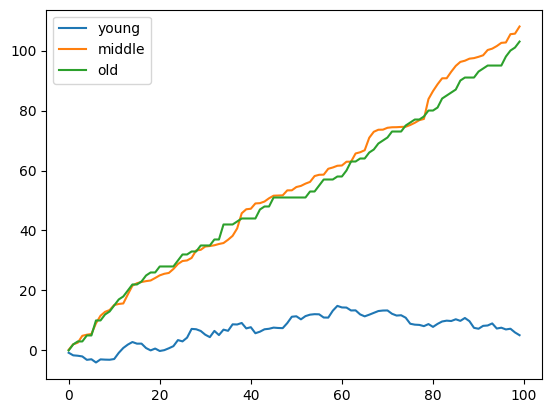

In [ ]:
variables = pd.DataFrame({'young': np.random.normal(size=100), 'middle' : np.random.gamma(1,size=100), 'old': np.random.poisson (size=100)})
variables.cumsum(0).plot()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/4.KNearestNeigbors
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/4.KNearestNeigbors
Customers.csv  Customers.xlsx  Intro.ipynb  KNN.ipynb  validation_set.csv


In [ ]:
df = pd.read_csv("Customers.csv")

print(df)


       Age  Income Student Credit_rating Buy_computer
0    young    high      no          fair           no
1    young    high      no     excellent           no
2   middle    high      no          fair          yes
3      old  medium      no          fair          yes
4      old     low     yes          fair          yes
5      old     low     yes     excellent           no
6   middle     low     yes     excellent          yes
7    young  medium      no          fair           no
8    young     low     yes          fair          yes
9      old  medium     yes          fair          yes
10   young  medium     yes     excellent          yes
11  middle  medium      no     excellent          yes
12  middle    high     yes          fair          yes
13     old  medium      no     excellent           no


In [ ]:
d_age = {'young': 0, 'middle': 1, 'old': 2}
d_income = {'high': 0, 'medium': 1, 'low': 2}
d_student = {'no': 0, 'yes': 1}
d_credit_rating = {'fair': 0, 'excellent': 1}
d_buy_computer = {'no': 0, 'yes': 1}

df['Age'] = df['Age'].map(d_age)
df['Income'] = df['Income'].map(d_income)
df['Student'] = df['Student'].map(d_student)
df['Credit_rating'] = df['Credit_rating'].map(d_credit_rating)
df['Buy_computer'] = df['Buy_computer'].map(d_buy_computer)

print(df)

    Age  Income  Student  Credit_rating  Buy_computer
0     0       0        0              0             0
1     0       0        0              1             0
2     1       0        0              0             1
3     2       1        0              0             1
4     2       2        1              0             1
5     2       2        1              1             0
6     1       2        1              1             1
7     0       1        0              0             0
8     0       2        1              0             1
9     2       1        1              0             1
10    0       1        1              1             1
11    1       1        0              1             1
12    1       0        1              0             1
13    2       1        0              1             0


<Axes: xlabel='Age'>

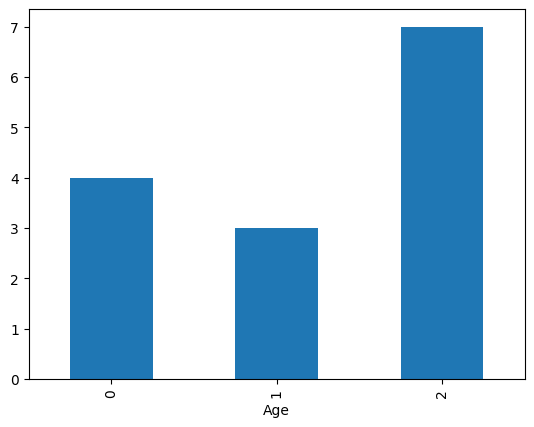

In [ ]:
df.groupby('Age').Income.sum().plot(kind='bar')


<Axes: ylabel='Age,Student'>

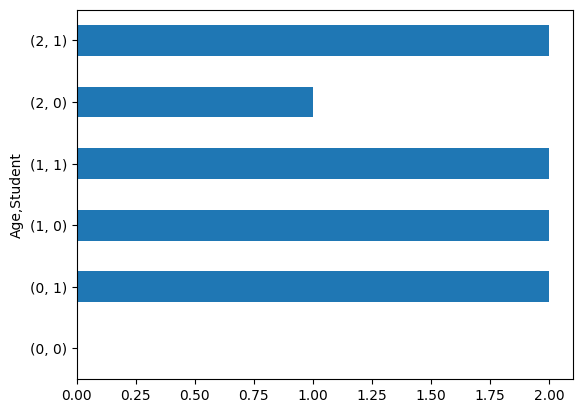

In [ ]:
df.groupby(['Age', 'Student']).Buy_computer.sum().plot(kind='barh')

<Axes: xlabel='Age,Income'>

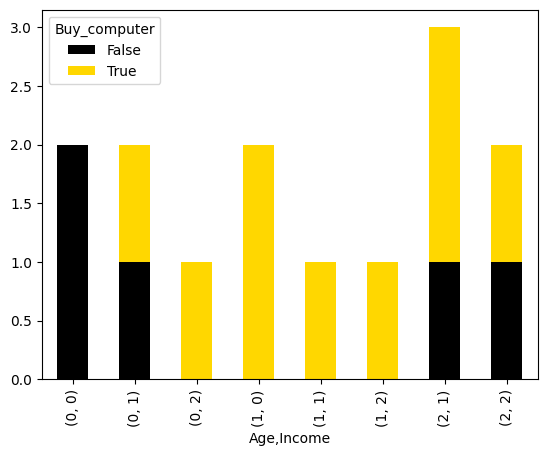

In [ ]:
buy_counts = pd.crosstab([df.Age, df.Income], df.Buy_computer.astype(bool))
buy_counts.plot(kind='bar', stacked = True, color = ['black','gold'],grid= False)